# A brief (but painful) intro to ``FloPy``

### Here we will load an existing USGS groundwater model, update the file structure, write new input files, rerun the model and export the inputs and outputs

In [2]:
%matplotlib inline
import sys
import os
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy

print(sys.version)
print('python installation location: {}'.format(os.path.dirname(sys.executable)))
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.2 (default, Jul 21 2017, 16:25:03) 
[GCC 4.9.1]
python installation location: /home/04950/dhl/local/bin
numpy version: 1.11.1
matplotlib version: 2.0.2
flopy version: 3.2.6


The ``path`` to the original model files

In [4]:
org_model_ws = os.path.join("MF2K_BS")
assert os.path.exists(org_model_ws)

You need to point to the location in your file structure to MODFLOW 2005

In [57]:
exe_name = "mf2005"

## Load the existing model with ``FloPy``

In [46]:
m = flopy.modflow.Modflow.load("SPRING.nam",
                               model_ws=org_model_ws,
                               exe_name=exe_name,
                              verbose=False)

## Processing model inputs
Once the model is in memory, ``FloPy`` exposes several built-in methods a al ``pandas``

In [29]:
m.sr.lenuni = 1
m.dis.export(m.name+".dis.shp")

In [30]:
m.export(m.name+".nc")

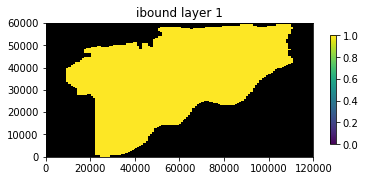

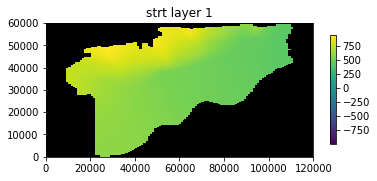

In [47]:
m.bas6.plot()

Some modern MODFLOW options:

In [48]:
m.array_free_format = True
m.bas6.ifrefm = True
m.remove_external("ddn")


Any additional modifications can be made here...like a scenario?

In [49]:
wel_spd = m.wel.stress_period_data

In [50]:
for i in range(m.nper):
    wel_spd[i]["flux"] *= .75

## Change the model work space, write new input files and re-run

In [51]:
base_model_ws = "base"
m.change_model_ws(base_model_ws,reset_external=True)



changing model workspace...
   base


In [52]:
m.write_input()

In [58]:
m.run_model()

FloPy is using the following executable to run the model: /home/0003/train353/local/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: SPRING.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/07/25 17:24:31

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8

 Solving:  Stress period:    10    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    10    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    11    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    11    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    11    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    11    Time step:     4    Ground-Wa

 Solving:  Stress period:    21    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    21    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    22    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    22    Time step:     2    Ground-Wa

 Solving:  Stress period:    31    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    32    Time step:     1    Ground-Wa

 Solving:  Stress period:    41    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    41    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    42    Time step:     1    Ground-Wa

 Solving:  Stress period:    51    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    51    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    52    Time step:     1    Ground-Wa

 Solving:  Stress period:    62    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    62    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    63    Time step:     1    Ground-Wa

 Solving:  Stress period:    70    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    70    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    71    Time step:    11    Ground-Wa

 Solving:  Stress period:    80    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    80    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    81    Time step:     1    Ground-Wa

 Solving:  Stress period:    90    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    90    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    91    Time step:    11    Ground-Wa

 Solving:  Stress period:   101    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   102    Time step:     1    Ground-Wa

 Solving:  Stress period:   112    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   112    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   113    Time step:     1    Ground-Wa

(True, [])

## Output processing

We can process the MODFLOW ``lst`` file for global water budget info

In [59]:

mflist = flopy.utils.MfListBudget(os.path.join(m.model_ws,"OUTPUT.DAT"))

In [60]:
flx,vol = mflist.get_dataframes(start_datetime=m.start_datetime)

In [ ]:
flx.columns

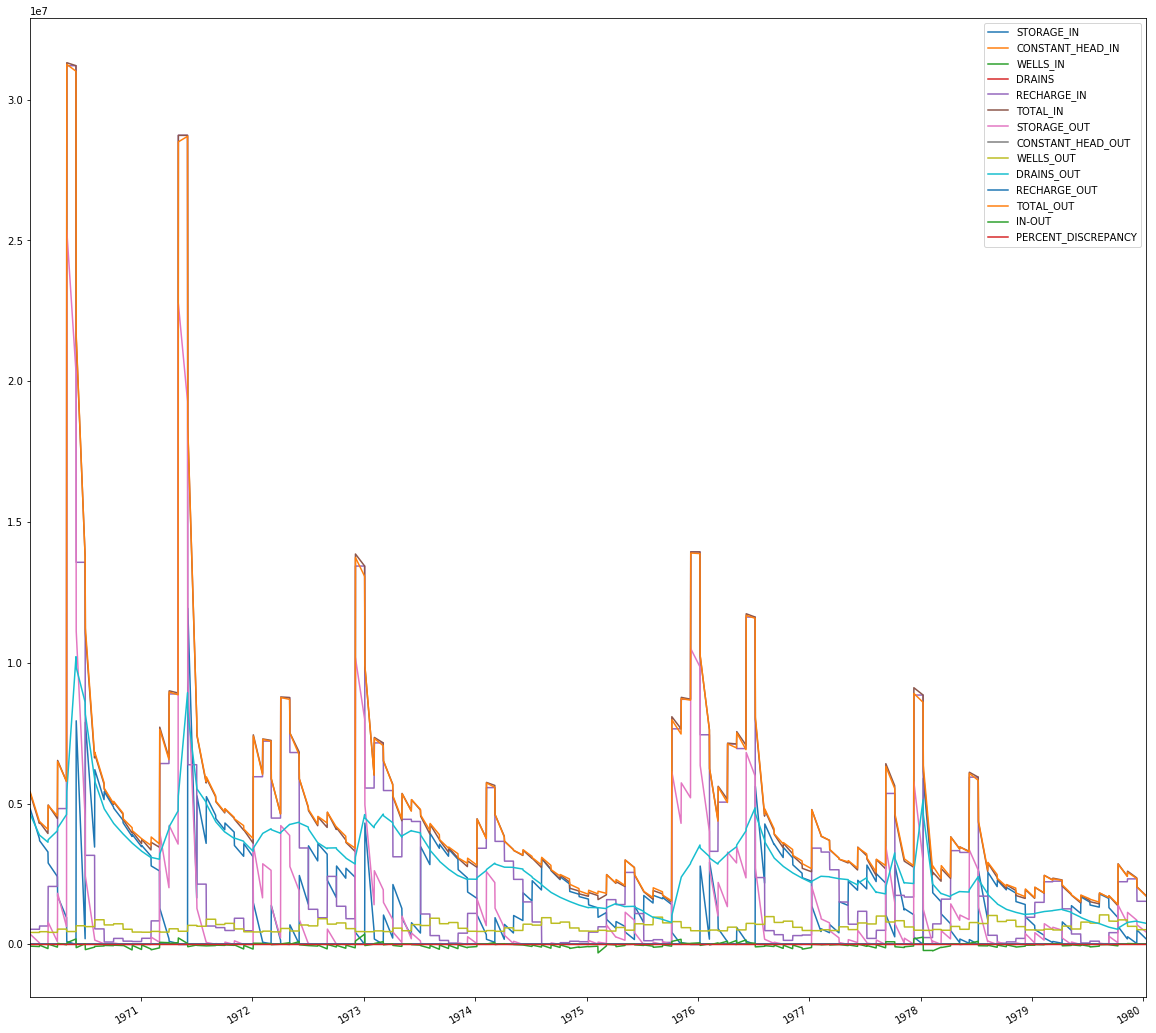

In [61]:
flx.plot(figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b84d2d129e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x2b84d32896d8>], dtype=object)

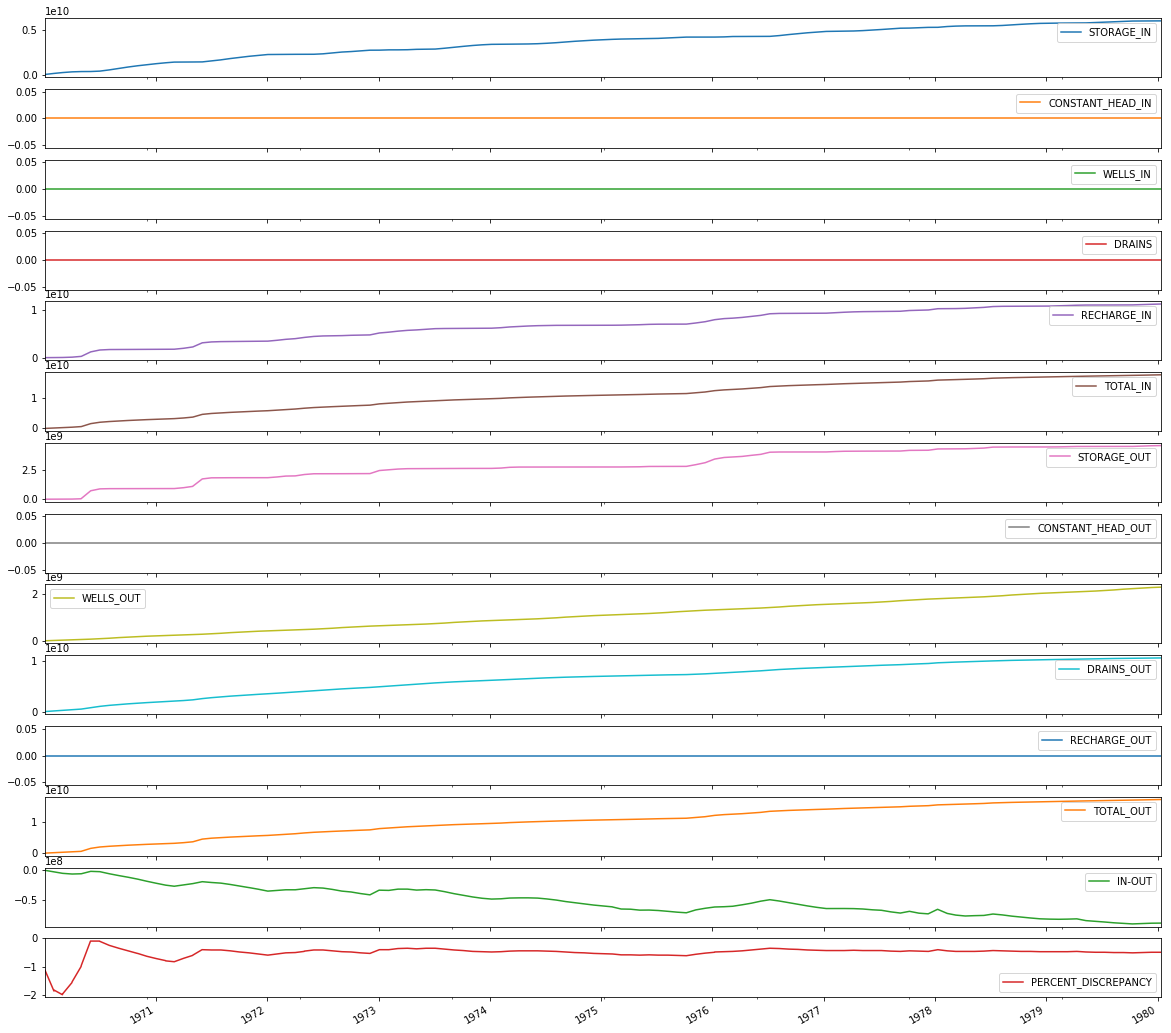

In [62]:
vol.plot(figsize=(20,20),subplots=True)

In [73]:
vol.columns

Index(['STORAGE_IN', 'CONSTANT_HEAD_IN', 'WELLS_IN', 'DRAINS', 'RECHARGE_IN',
       'TOTAL_IN', 'STORAGE_OUT', 'CONSTANT_HEAD_OUT', 'WELLS_OUT',
       'DRAINS_OUT', 'RECHARGE_OUT', 'TOTAL_OUT', 'IN-OUT',
       'PERCENT_DISCREPANCY'],
      dtype='object')

In [81]:
drn_tot = vol.loc[:,["DRAINS_OUT", "WELLS_OUT"]].iloc[-1]
drn_tot.loc["STORAGE"] = vol.loc[:,"STORAGE_IN"].iloc[-1] - vol.loc[:,"STORAGE_OUT"].iloc[-1]
drn_tot
#drn_tot.plot(kind="bar")

DRAINS_OUT    1.058951e+10
WELLS_OUT     2.310855e+09
STORAGE       1.445846e+09
Name: 1980-01-11 00:00:00, dtype: float64

In [82]:
drn_tot.to_csv("jrm.csv")

In [66]:
flx.loc[:,"WELLS_OUT"].plot(figsize=(10.10))

TypeError: from_bounds() argument after * must be an iterable, not float

## binary output processing

In [18]:
hds = flopy.utils.HeadFile(os.path.join(m.model_ws,m.name+".hds"),model=m)
hds.times[:5]

[1.0, 3653.5, 14611.0, 18263.5, 20089.75]

The ``HeadFile`` object exposes lots of nice options for post-processing

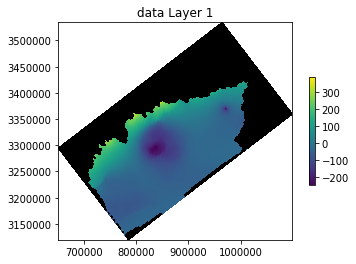

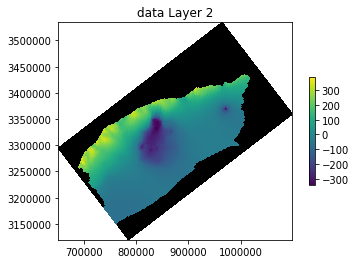

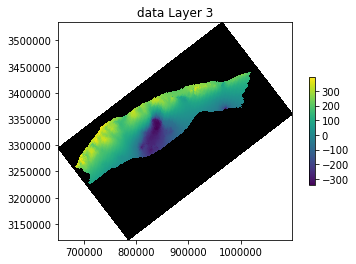

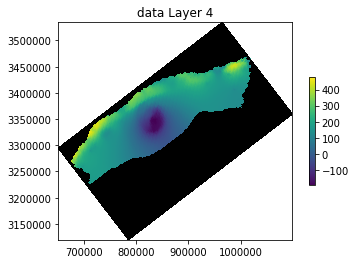

In [21]:
hds.plot(totim=hds.times[-1],colorbar=True)

In [22]:
hds.to_shapefile(m.name+".hds.shp",totim=hds.times[5])

In [19]:
data = hds.get_data()

In [20]:
flopy.export.utils.output_helper(m.name+".hds.nc",m,{"hds":hds})